In [1]:
import numpy as np
import scipy.io

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

data = scipy.io.loadmat('annualrainfall.mat')
matrix = data['XR']

In [2]:
# part 1
#calculating standard deviation and mean of rainfall

total_rainfall = np.zeros(matrix.shape[1])
for i in range(matrix.shape[1]):
    for j in range(matrix.shape[0]):
        total_rainfall[i] = matrix[j][i] + total_rainfall[i]

m = total_rainfall.mean() # mean of total rainfall
s = total_rainfall.std() # standard deviation

print("Mean Rainfall = " + str(m))
print("Standard Deviation of Rainfall = " + str(s))

Mean Rainfall = 2731.5638988707724
Standard Deviation of Rainfall = 266.8989059344519


In [4]:
# part 2
# assigning labels to years

year_labels = np.zeros(matrix.shape[1])

for i in range(matrix.shape[1]):
    if(total_rainfall[i] < (m-s)):
        year_labels[i] = '-1'
    elif(total_rainfall[i] > (m+s)):
        year_labels[i] = '+1'
    else:
        year_labels[i] = '0'



In [5]:
# part 3
# creating train sets and feature and label name sets

trainX = np.transpose(matrix)[0:100]
trainY = year_labels[0:100]

features = []
for i in range(matrix.shape[0]):
    features.append('Location '+str(i+1))
    
labels = ['-1','0','1']

print('The locations used can be seen in the below visualization \nof decision tree. The locations and years are indexed from 1')

The locations used can be seen in the below visualization 
of decision tree. The locations and years are indexed from 1


The locations used are explicitly given by their indexes(starting from 1) :
 18 52 73 77 123 154 172 210 220 236 263 329


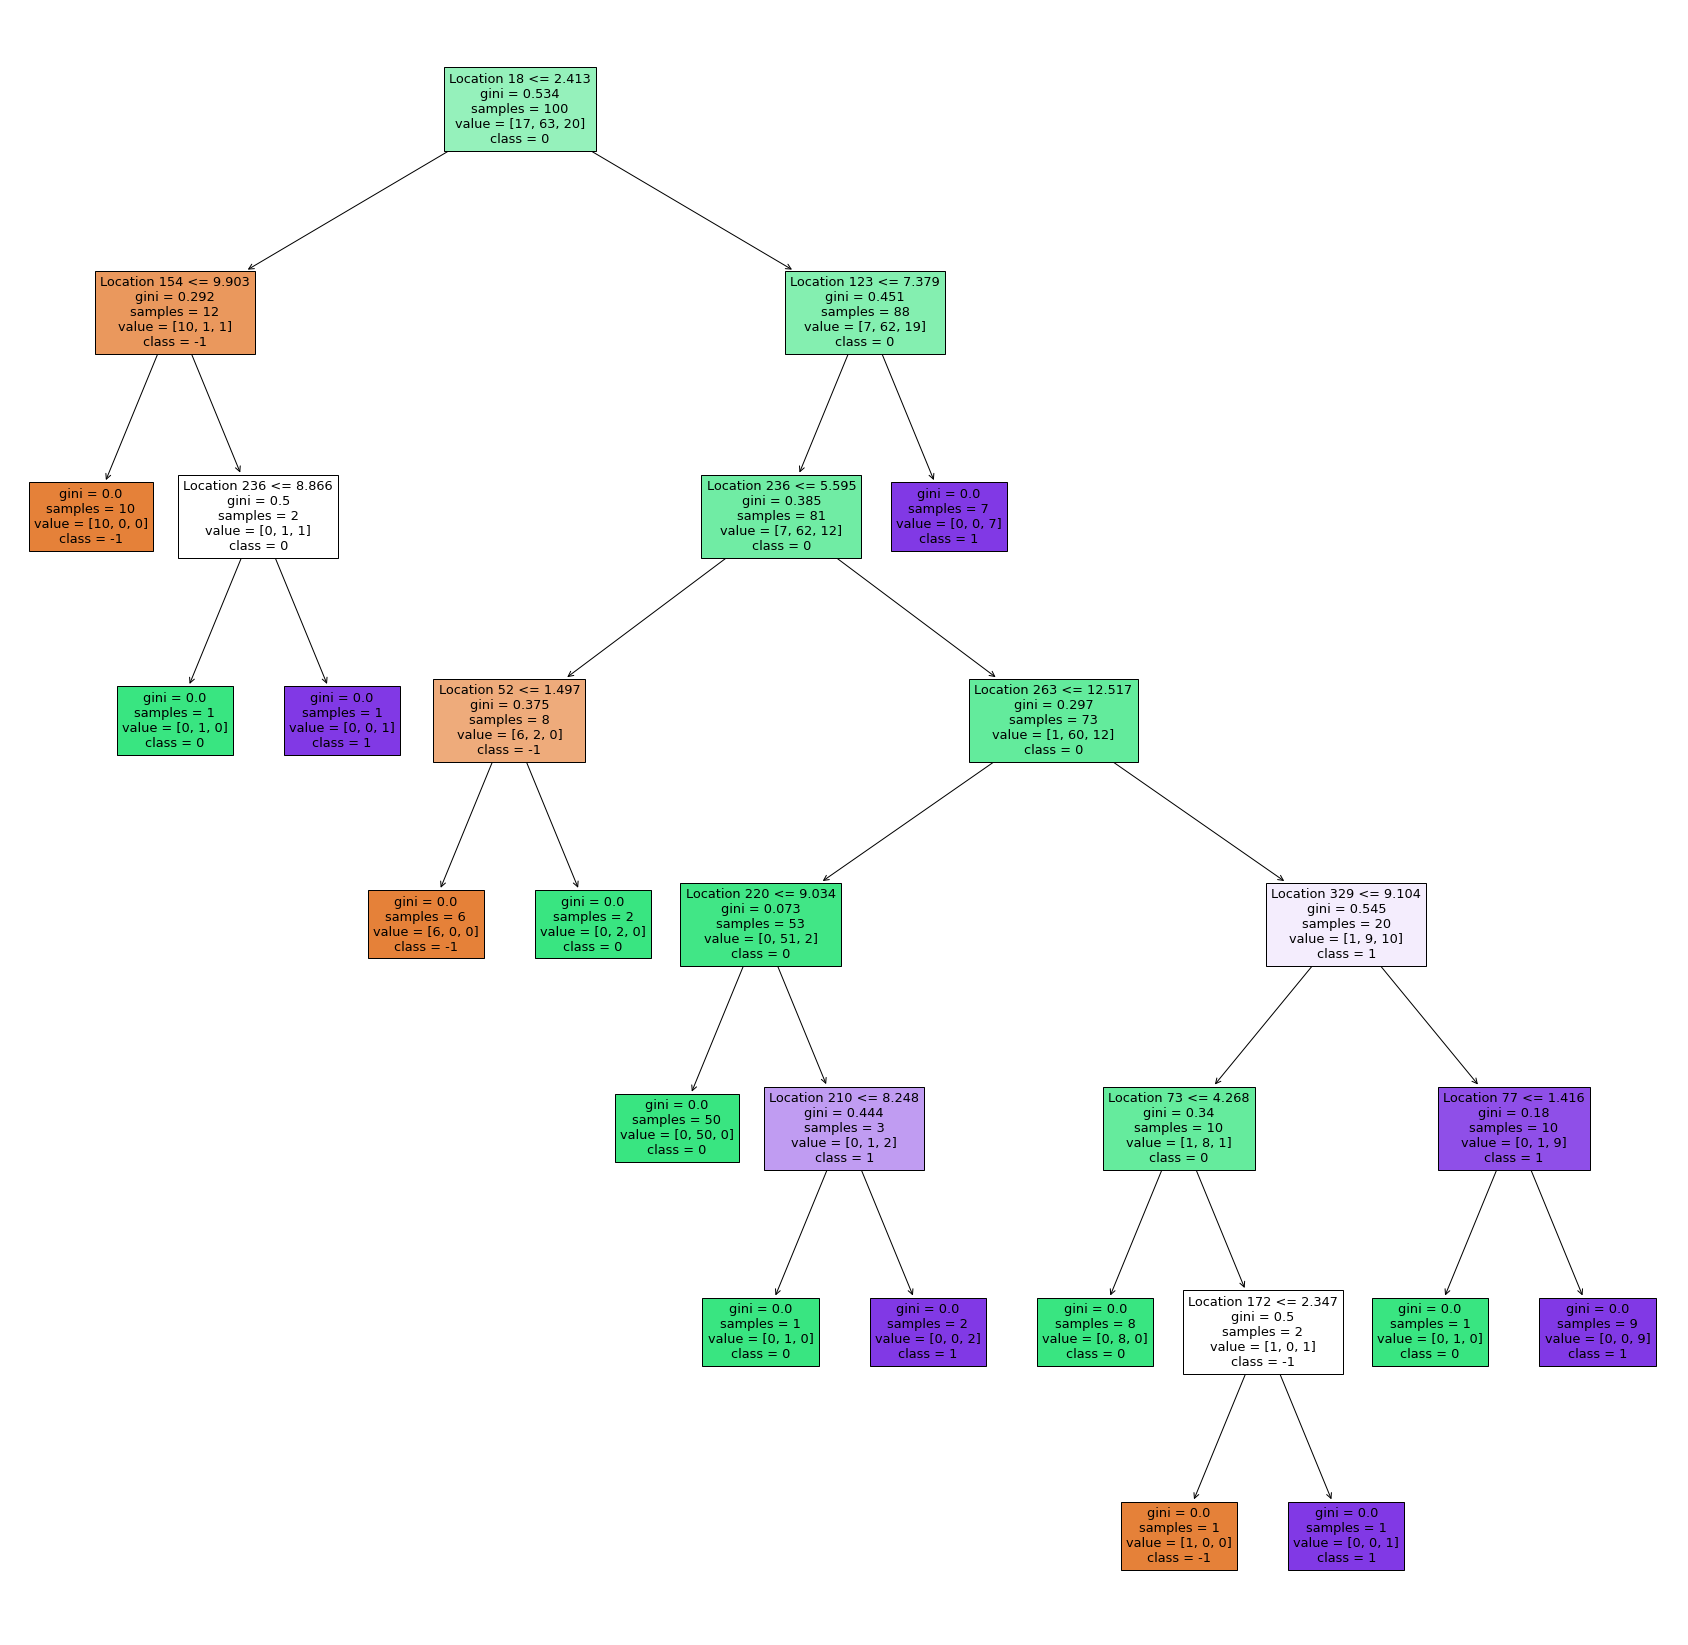

In [6]:
# part 3
# implement decision tree and note down locations used

fig = plt.figure(figsize=(30,30))
model = tree.DecisionTreeClassifier(max_depth=10).fit(trainX,trainY)
arr = model.feature_importances_
print("The locations used are explicitly given by their indexes(starting from 1) :")
count = 0
strol = ''
for i in arr:
    count += 1
    if(i>0):
        strol += ' ' + str(count)
print(strol)
fig = tree.plot_tree(model, feature_names = features, class_names=labels,filled=True)

----Cross-Validating Decision Tree----
Mean Accuracy = 0.5199999999999999
Standard Deviation = 0.05099019513592784
Accuracy for decision tree after testing :  0.5


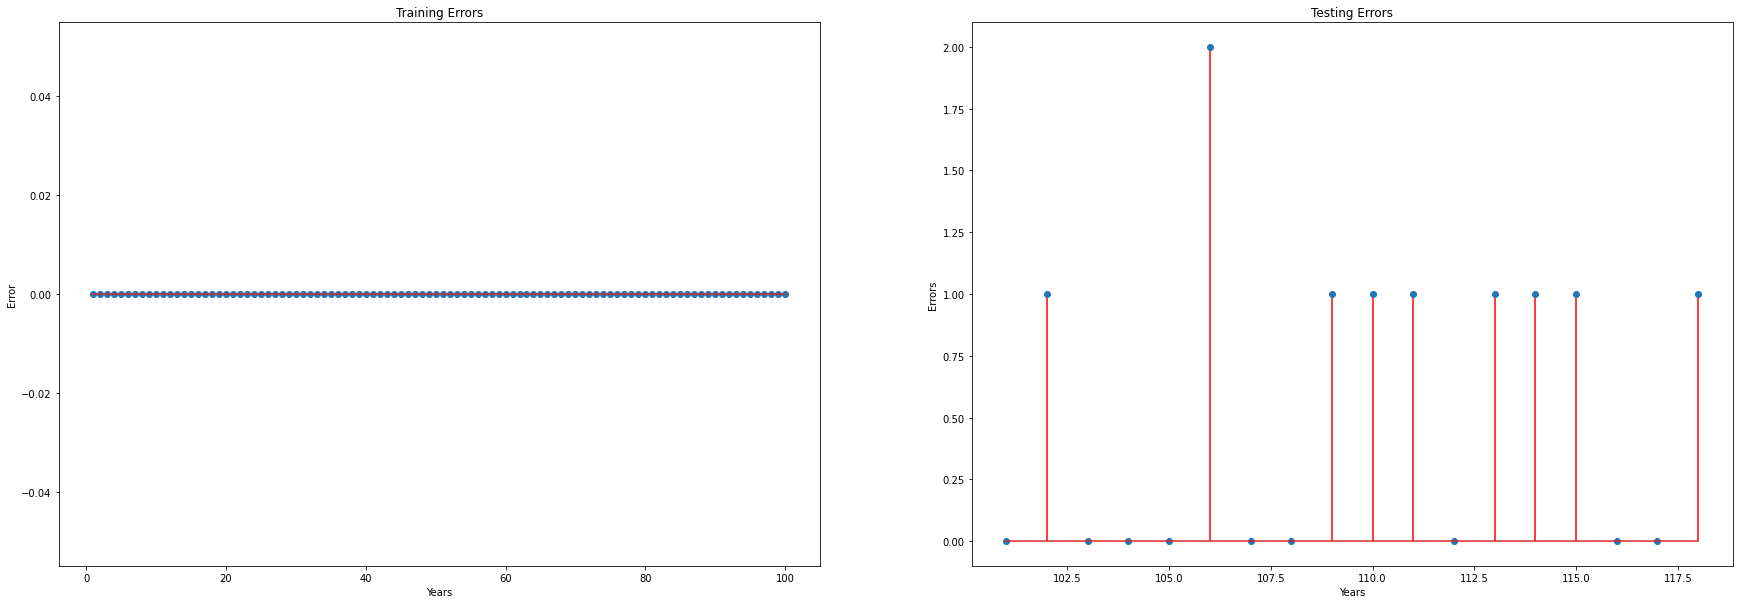

In [7]:
# part 3
# train using cross validation

accuracies = cross_val_score(model, trainX, trainY, cv=5) #5 fold cross validation
print("----Cross-Validating Decision Tree----")
print("Mean Accuracy = " + str(accuracies.mean()))
print("Standard Deviation = " + str(accuracies.std()))

# part 3
# testing on last 18 years

testX = np.transpose(matrix)[100:118]
testY = year_labels[100:118]
predicted_label = model.predict(testX)
print("Accuracy for decision tree after testing : ",metrics.accuracy_score(testY, predicted_label))

# part 3
# plotting training as well as test error

#first find error
j = 0
error = []
predY = model.predict(np.transpose(matrix))
for i in predY:
    error += [abs(int(i)-int(year_labels[j]))]
    j += 1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.subplot(1, 2, 1)
plt.stem(range(1,101),error[0:100],linefmt='r-')
plt.xlabel("Years")
plt.ylabel("Error")
a = plt.title("Training Errors")

plt.subplot(1, 2, 2)
plt.stem(range(101,119),error[100:118],linefmt='r-')
plt.xlabel("Years")
plt.ylabel("Errors")
b = plt.title("Testing Errors")


----Cross-Validating Random Forest----
Mean Accuracy = 0.6699999999999999
Standard Deviation = 0.05099019513592784

Accuracy for random forest after testing :  0.7222222222222222
Yes we see that results improve!


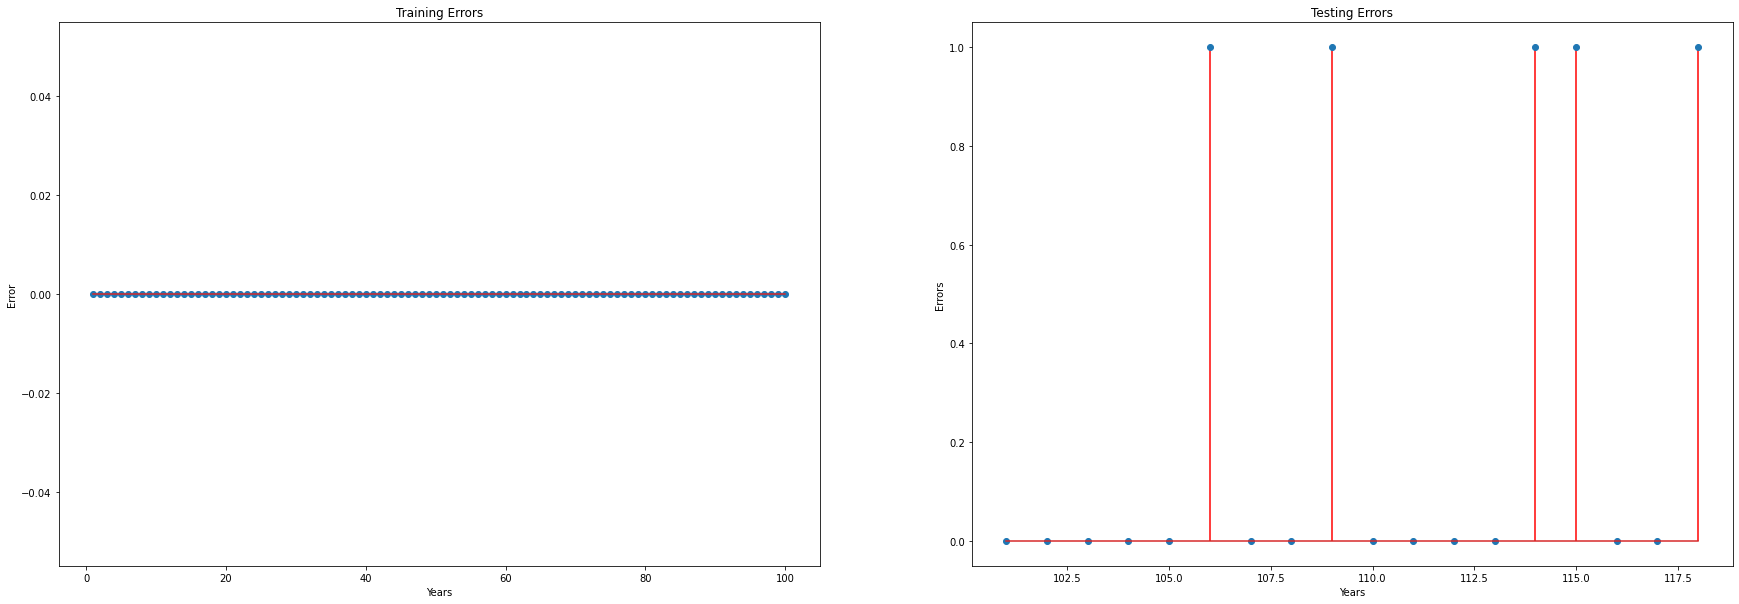

In [8]:
# part 4
# repeating same analysis with random forest

modelRf = RandomForestClassifier().fit(trainX,trainY)

accuracies = cross_val_score(modelRf, trainX, trainY, cv=5) #5 fold cross validation
print("----Cross-Validating Random Forest----")
print("Mean Accuracy = " + str(accuracies.mean()))
print("Standard Deviation = " + str(accuracies.std()))

predicted_label = modelRf.predict(testX)
print("\nAccuracy for random forest after testing : ",metrics.accuracy_score(testY, predicted_label))

print("Yes we see that results improve!")

# part 3
# plotting training as well as test error

#first find error
j = 0
error = []
predY = modelRf.predict(np.transpose(matrix))
for i in predY:
    error += [abs(int(i)-int(year_labels[j]))]
    j += 1

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.subplot(1, 2, 1)
plt.stem(range(1,101),error[0:100],linefmt='r-')
plt.xlabel("Years")
plt.ylabel("Error")
a = plt.title("Training Errors")

plt.subplot(1, 2, 2)
plt.stem(range(101,119),error[100:118],linefmt='r-')
plt.xlabel("Years")
plt.ylabel("Errors")
b = plt.title("Testing Errors")

In [9]:
# part 5
# assigning locational  labels

location_labels = np.ndarray(shape=(357,118))

for i in range(357):
    m = matrix[i].mean()
    s = matrix[i].std()
    for j in range(118):
        if(matrix[i][j] < (m-s)):
            location_labels[i][j] = '-1'
        elif(matrix[i][j] > (m+s)):
            location_labels[i][j] = '+1'
        else:
            location_labels[i][j] = '0'

In [10]:
# an utility function for evaluating the indexes of top 10 elements of the array
#print(arr)
def find_top_10_indexes(arr):
    top10 = [1,1,1,1,1,1,1,1,1,1]
    val = [1,1,1,1,1,1,1,1,1,1]
    
    mxel = -1
    count = 0
    for i in arr:
        count += 1
        if(i > mxel):
            mxel = i
            top10[0] = count
    
    val[0] = arr[top10[0]-1]

    for i in range(1,10,1):
        count = 0
        mxel = -1
        for j in arr:
            count += 1
            if(j < val[i-1]):
                if(j > mxel):
                    top10[i] = count
                    mxel = j
            elif(j == val[i-1]):
                flag = True
                for m in range(0,i):
                    if(count == (top10[m])):
                        flag = False
                if(flag):
                    mxel = j
                    top10[i] = count
        val[i] = arr[top10[i]-1]
        
    return np.array(top10)

In [ ]:
# part 6
# implement decision tree

model_l = [] # the model stores the decision tree for prediction in each location
accuracy_l = [] # accuracy for testing
cvl = [] # cross validations scores
top_10_predicitive_regions_l = []
matrixT = np.transpose(matrix)
for i in range(357):
    trainX = []
    trainY = []
    splitter = []
    
    # first 100 years for training
    for j in range(100):
        if(i!=356 and i!=0):
            splitter = np.concatenate((matrixT[j][0:i],matrixT[j][i+1:357]))
        elif(i==356):
            splitter = matrixT[j][0:i]
        else:
            splitter = matrixT[j][1:357]
        trainY.append(location_labels[i][j])
        trainX.append(splitter)
    
    testX = []
    testY = []
    splitter = []
    
    # next 18 years for testing 
    for j in range(100,118,1):
        if(i!=356 and i!=0):
            splitter = np.concatenate((matrixT[j][0:i],matrixT[j][i+1:357]))
        elif(i==356):
            splitter = matrixT[j][0:i]
        else:
            splitter = matrixT[j][1:357]
        testY.append(location_labels[i][j])
        testX.append(splitter)
    
    trainX = np.array(trainX)
    trainY = np.array(trainY)
    
    testX = np.array(testX)
    testY = np.array(testY)

    # the decision tree model for each location
    model_l += [tree.DecisionTreeClassifier(max_depth=10).fit(trainX,trainY)] 
    
    # the decision tree for prediction in each location
    top_10_predicitive_regions_l += [find_top_10_indexes(model.feature_importances_)]
    
    # 5 fold cross validation
    cvl += [cross_val_score(modelRf, trainX, trainY, cv=5)] 
    
    predicted_label = model_l[i].predict(testX)
    accuracy_l += [metrics.accuracy_score(testY, predicted_label)]

In [ ]:
# part 7
# implement random forest and do the same analysis as part 6

model_l = [] # the model stores the decision tree for prediction in each location
accuracy_l = [] # accuracy for testing
cvl = [] # cross validations scores
top_10_predicitive_regions_l = []
matrixT = np.transpose(matrix)
for i in range(357):
    trainX = []
    trainY = []
    splitter = []
    
    # first 100 years for training
    for j in range(100):
        if(i!=356 and i!=0):
            splitter = np.concatenate((matrixT[j][0:i],matrixT[j][i+1:357]))
        elif(i==356):
            splitter = matrixT[j][0:i]
        else:
            splitter = matrixT[j][1:357]
        trainY.append(location_labels[i][j])
        trainX.append(splitter)
    
    testX = []
    testY = []
    splitter = []
    
    # next 18 years for testing 
    for j in range(100,118,1):
        if(i!=356 and i!=0):
            splitter = np.concatenate((matrixT[j][0:i],matrixT[j][i+1:357]))
        elif(i==356):
            splitter = matrixT[j][0:i]
        else:
            splitter = matrixT[j][1:357]
        testY.append(location_labels[i][j])
        testX.append(splitter)
    
    trainX = np.array(trainX)
    trainY = np.array(trainY)
    
    testX = np.array(testX)
    testY = np.array(testY)

    # the random forest model for each location
    model_l += [RandomForestClassifier(max_depth=10).fit(trainX,trainY)] 
    
    # the random forest for prediction in each location
    top_10_predicitive_regions_l += [find_top_10_indexes(model.feature_importances_)]
    
    # 5 fold cross validation
    cvl += [cross_val_score(modelRf, trainX, trainY, cv=5)] 
    
    predicted_label = model_l[i].predict(testX)
    accuracy_l += [metrics.accuracy_score(testY, predicted_label)]